In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
RESULTS = "/mnt/biocluster/praktikum/genprakt/kayser/Solution1/"

In [ ]:
'''The report should contain
at least two cumulative plots (see definition on the internet or an R tutorial) showing the
1Guideline: a bunch of plots without a clear explanation of what is shown, without description of what
can be observed, or without a statement what can be concluded is not a sufficient report and will be graded
accordingly.
3
distributions of the maximum number of skipped exons and skipped bases, respectively,
per ES-SE for every GTF file. The plots have to be saved also into your output directory
named skipped_exons.jpg and skipped_bases.jpg. '''

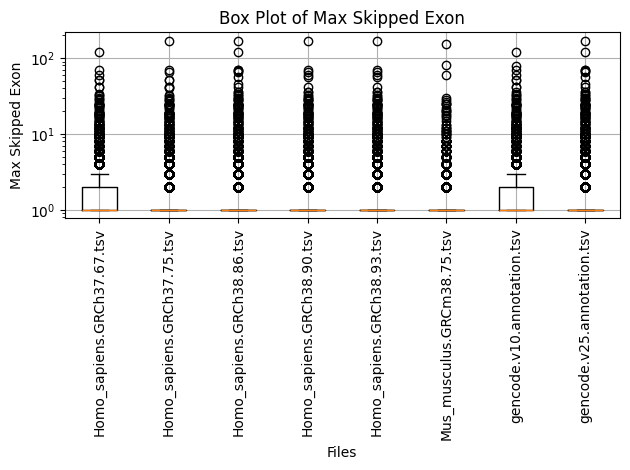

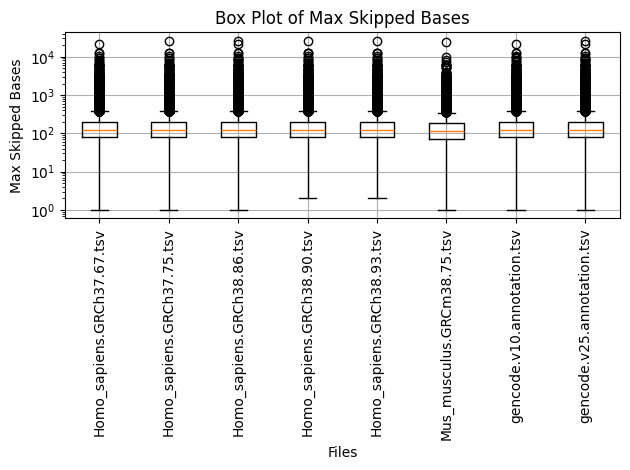

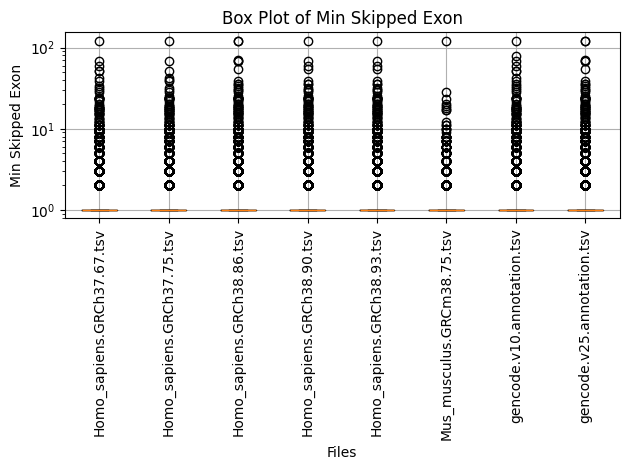

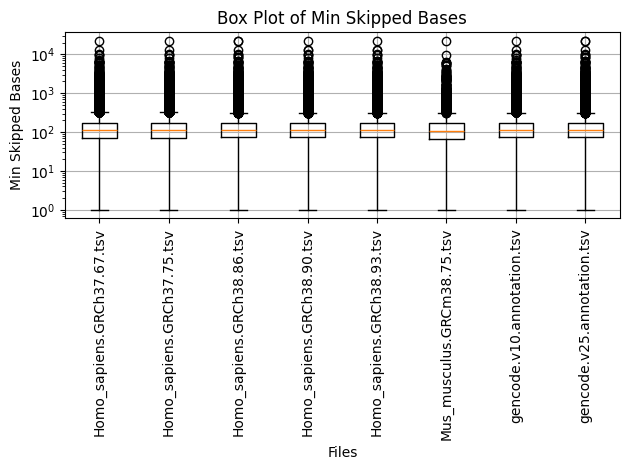

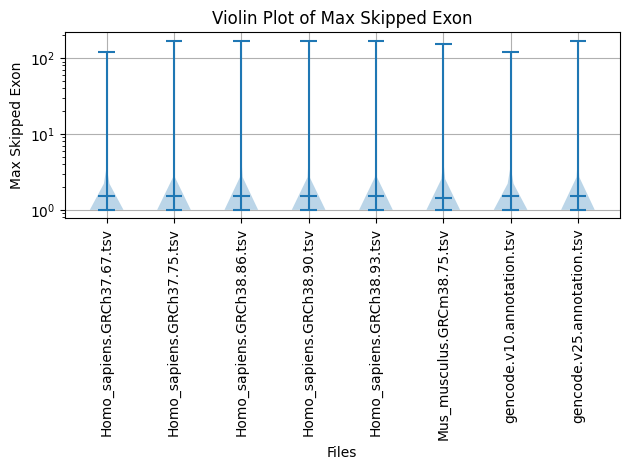

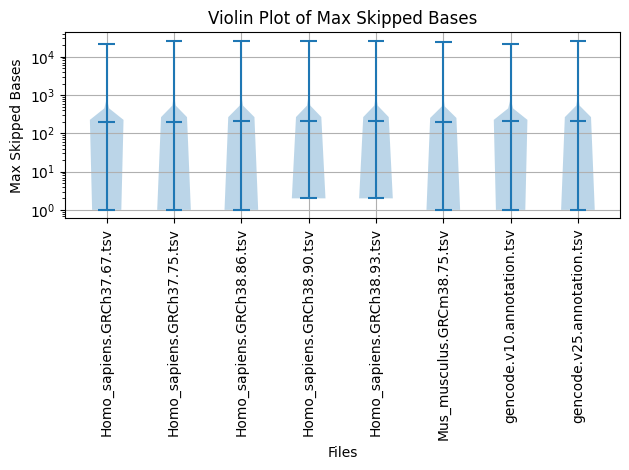

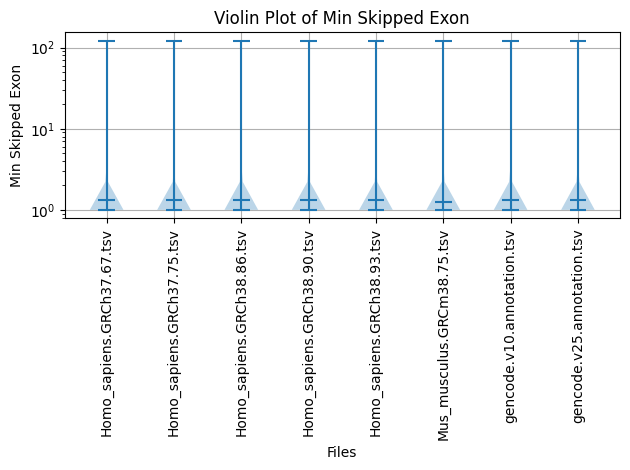

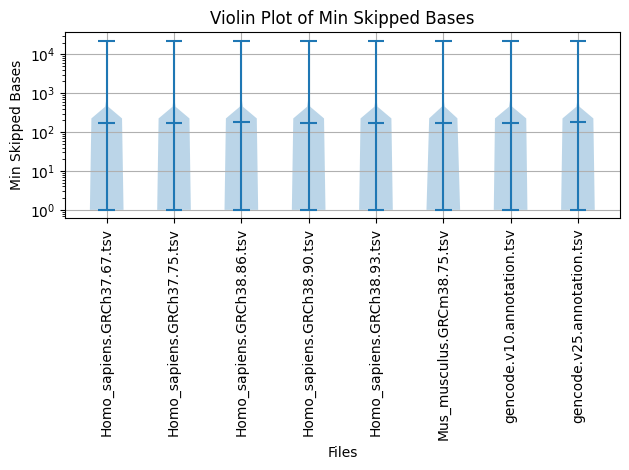

In [12]:
# List to store the file names
tsv_data = {}

# Iterate over all files in the directory
for file_name in os.listdir(RESULTS):
    # only if .tsv
    if file_name[-4:] == ".tsv" and file_name != "Saccharomyces_cerevisiae.R64-1-1.75.tsv":
        data = pd.read_csv(os.path.join(RESULTS,file_name), sep="\t")
        tsv_data[file_name] = data

# Create the figures
# Initialize dictionaries to store data for box plots
data_dict = {
    'max_skipped_exon': [],
    'max_skipped_bases': [],
    'min_skipped_exon': [],
    'min_skipped_bases': []
}

# Extract the values from the existing columns
for file_name, data in tsv_data.items():
    data_dict['max_skipped_exon'].append(data['max_skipped_exon'].values)
    data_dict['max_skipped_bases'].append(data['max_skipped_bases'].values)
    data_dict['min_skipped_exon'].append(data['min_skipped_exon'].values)
    data_dict['min_skipped_bases'].append(data['min_skipped_bases'].values)

# Create box plots
for key, values in data_dict.items():
    plt.figure()
    plt.boxplot(values, labels=tsv_data.keys())
    plt.yscale('log')
    plt.title(f'Box Plot of {key.replace("_", " ").title()}')
    plt.xlabel('Files')
    plt.ylabel(key.replace("_", " ").title())
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(os.path.join(RESULTS, f'boxplot_{key}.jpg'))
    plt.show()
    plt.close()
for key, values in data_dict.items():
    plt.figure()
    plt.violinplot(values, showmeans=True)
    plt.yscale('log')
    plt.title(f'Violin Plot of {key.replace("_", " ").title()}')
    plt.xlabel('Files')
    plt.ylabel(key.replace("_", " ").title())
    plt.xticks(ticks=range(1, len(tsv_data.keys()) + 1), labels=tsv_data.keys(), rotation=90)
    plt.grid(True)
    plt.tight_layout()
    # plt.savefig(os.path.join(RESULTS, f'violinplot_{key}.jpg'))
    plt.show()
    plt.close()
